### Module 5
# Modern Portfolio Theory

In this module, We’ll be looking at investment portfolio optimization with python, the fundamental concept of diversification and the creation of an efficient frontier that can be used by investors to choose specific mixes of assets based on investment goals; that is, the trade off between their desired level of portfolio return vs their desired level of portfolio risk.

[Modern Portfolio Theory](https://www.investopedia.com/terms/m/modernportfoliotheory.asp) suggests that it is possible to construct an "efficient frontier" of optimal portfolios, offering the maximum possible expected return for a given level of risk. It suggests that it is not enough to look at the expected risk and return of one particular stock. By investing in more than one stock, an investor can reap the benefits of diversification, particularly a reduction in the riskiness of the portfolio. MPT quantifies the benefits of diversification, also known as not putting all of your eggs in one basket.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import glob
import random

## Problem Statements


### Problem Statement 5.1: Annualized Volatility and Returns
For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [2]:
itc_df = pd.read_csv('ITC.csv', parse_dates=['Date']).set_index('Date')
itc_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,ITC,EQ,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57


In [3]:
one_solution = {}

In [4]:
itc_df['Daily_Return'] = (itc_df['Close Price']).pct_change() 
itc_df['Daily_Return'] = itc_df['Daily_Return'].replace([np.inf, -np.inf], np.nan)
itc_df = itc_df.dropna()
print("Mean Daily Return", itc_df['Daily_Return'].mean())
one_solution['Avg_Daily_Returns'] = itc_df['Daily_Return'].mean()

Mean Daily Return 0.00018151806478190503


In [5]:
itc_df['Daily_STD'] = (itc_df['Close Price']).pct_change() 
itc_df['Daily_STD'] = itc_df['Daily_STD'].replace([np.inf, -np.inf], np.nan)
itc_df = itc_df.dropna()
print("Daily Standard Deviation", itc_df['Daily_STD'].std())
one_solution['STD_Daily_Returns'] = itc_df['Daily_STD'].mean()

Daily Standard Deviation 0.014122617655045635


In [6]:
Annual_avg_return = one_solution['Avg_Daily_Returns']  * 252
one_solution['Annual_avg_return'] = Annual_avg_return
print("Annual Mean: ",Annual_avg_return)

Annual Mean:  0.04574255232504006


In [7]:
Annual_STD_return = one_solution['STD_Daily_Returns'] * np.sqrt(252)
print("Annual Standard Deviation: ",Annual_STD_return)
one_solution['Annual_STD_return'] = Annual_STD_return

Annual Standard Deviation:  0.0022514715037564997


### Problem Statement 5.2

Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [8]:
def read_csv(filename):
    return pd.read_csv(filename, parse_dates=['Date'])['Close Price']

In [9]:
csv_files = glob.glob('..\datasets\**\*.csv')
filenames = random.sample(csv_files, 5)

In [10]:
filenames

['..\\datasets\\Mid_Cap\\TATAPOWER.csv',
 '..\\datasets\\Small_Cap\\LUXIND.csv',
 '..\\datasets\\Large_Cap\\ITC.csv',
 '..\\datasets\\Small_Cap\\SUZLON.csv',
 '..\\datasets\\Mid_Cap\\VOLTAS.csv']

In [11]:
df = pd.DataFrame()

for fname in filenames:
    df[fname.split('\\')[-1][:-4]] = read_csv(fname)
print("Closing Prices of the 5 required stocks")
df.head()

Closing Prices of the 5 required stocks


,TATAPOWER,LUXIND,ITC,SUZLON,VOLTAS
0,83.55,819.60,277.95,19.6,431.85
1,83.85,817.50,283.45,19.7,432.45
2,85.35,819.80,281.65,19.9,430.20
3,83.75,820.05,277.90,20.0,414.10
4,84.15,817.80,286.20,20.6,415.75


In [12]:
equal_weights = np.full(df.shape[1], 1/df.shape[1])
equal_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [13]:
def portfolio_annual_returns(df, weights):
    return np.sum(df.pct_change().mean() * weights ) * 252  

round(portfolio_annual_returns(df, equal_weights), 2 )

-0.01

In [14]:
portfolio_covarence = df.pct_change().cov()
portfolio_covarence

,TATAPOWER,LUXIND,ITC,SUZLON,VOLTAS
TATAPOWER,0.000377,0.000081,0.000020,0.000226,0.000102
LUXIND,0.000081,0.000446,0.000012,0.000159,0.000063
ITC,0.000020,0.000012,0.000199,0.000058,0.000031
SUZLON,0.000226,0.000159,0.000058,0.001395,0.000218
VOLTAS,0.000102,0.000063,0.000031,0.000218,0.000377


In [15]:
def portfolio_annual_volatility(portfolio, weights): 
    return np.sqrt(np.dot(weights.T, np.dot(df.pct_change().cov(), weights)) * np.sqrt(252))

round(portfolio_annual_volatility(df, equal_weights), 2)

0.05

In [16]:
def portfolio_sharpe(df, weights ): 
    return portfolio_annual_returns(df, weights ) / portfolio_annual_volatility(df, weights )

round(portfolio_sharpe(df, equal_weights), 2)

-0.23

In [17]:
print("Portfolio Annualized Mean Return: ", round(portfolio_annual_returns(df, equal_weights), 2))
print("Portfolio Annualized Volatility:  ", round(portfolio_annual_volatility(df, equal_weights), 2))


Portfolio Annualized Mean Return:  -0.01
Portfolio Annualized Volatility:   0.05


### Problem Statement  5.3  Monty-Carlo Simulation1
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.


In [18]:
def normalize_weights(weights):
    for i in range(0,3):
        weights  = np.round(weights, 3) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(df.shape[1])
    return normalize_weights(weights)

random_weights()

array([0.249, 0.385, 0.133, 0.206, 0.027])

In [19]:
scatter_data = pd.DataFrame()
for i in range(0, 2500):
    weights    = random_weights()
    returns    = portfolio_annual_returns(df, weights )
    volatility = portfolio_annual_volatility(df, weights )
    sharpe     = returns / volatility
    scatter_data = scatter_data.append([{ "weights":    weights,
        "returns":    returns,
        "volatility": volatility,
        "sharpe":     sharpe }])

scatter_data.reset_index(inplace=True, drop=True)
scatter_data.head()

,returns,sharpe,volatility,weights
0,-0.097783,-1.656732,0.059022,"[0.322, 0.128, 0.29, 0.251, 0.009]"
1,0.062260,1.388412,0.044843,"[0.081, 0.063, 0.502, 0.066, 0.288]"
2,-0.119039,-1.681282,0.070803,"[0.1651651651651652, 0.0900900900900901, 0.187..."
3,0.074542,1.586409,0.046988,"[0.20600000000000002, 0.24900000000000003, 0.2..."
4,-0.038551,-0.719078,0.053611,"[0.137, 0.079, 0.381, 0.22, 0.183]"


### Problem Statement  5.4 

Mark the 2 portfolios where -
- Portfolio 1 - The Sharpe ratio is the highest
- Portfolio 2 - The volatility is the lowest.

In [20]:
point_max_sharpe = scatter_data.loc[scatter_data['sharpe'].idxmax()]
point_max_sharpe

returns                                 0.164345
sharpe                                   3.44396
volatility                             0.0477199
weights       [0.022, 0.356, 0.277, 0.01, 0.335]
Name: 2110, dtype: object

In [21]:
point_min_volatility = scatter_data.loc[ scatter_data['volatility'].idxmin() ]
point_min_volatility

returns                                               0.0994806
sharpe                                                  2.38596
volatility                                            0.0416942
weights       [0.15184815184815184, 0.21278721278721277, 0.4...
Name: 1568, dtype: object

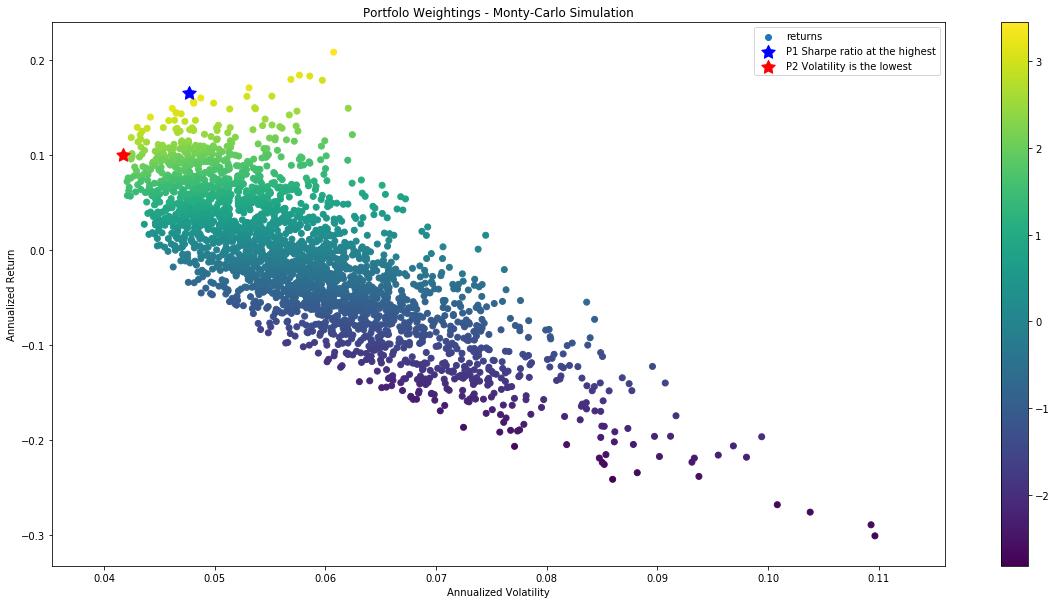

In [22]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
plt.scatter( 
    scatter_data.volatility,     
    scatter_data.returns, 
    c = scatter_data.sharpe)
plt.title('Portfolo Weightings - Monty-Carlo Simulation')
plt.ylabel('Annualized Return')
plt.xlabel('Annualized Volatility')
plt.colorbar()

# Mark the 2 portfolios where
plt.scatter(point_max_sharpe.volatility, point_max_sharpe.returns, marker=(5,1,0), c='b', s=200, label = 'P1 Sharpe ratio at the highest')
plt.scatter(point_min_volatility.volatility, point_min_volatility.returns, marker=(5,1,0), c='r', s=200, label = 'P2 Volatility is the lowest')
plt.legend()
plt.show()